# THE SPARK FOUNDATION

# DATA SCIENCE AND BUSINESS ANALYTICS INTERN

# NAME : MONOJIT PAL

# Task 1: Prediction using Supervised ML

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
link = "http://bit.ly/w-data"
df = pd.read_csv(link)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

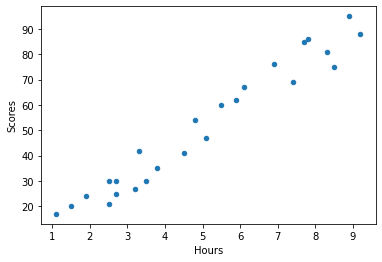

In [6]:
df.plot(kind ='scatter',x='Hours',y='Scores')

In [7]:
df.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [8]:
df.corr(method="spearman")

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [9]:
def null_detection(df):
    num_cols=[]
    count =0
    t=[]
    for i in num_cols:
        z= np.abs(stats.zscore(df[i]))
        for j in range(len(z)):
            if z[j]>3 or z[j]<-3 :
                t.append(j)
                count+=1
                
    df = df.drop(list(set(t)))
    df = df.reset_index()
    df = df.drop('index', axis =1)
    print(count)
    return df
                
    
    

In [10]:
df = null_detection(df)

0


c:\users\monoj\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


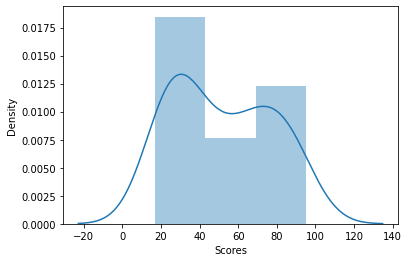

c:\users\monoj\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\monoj\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


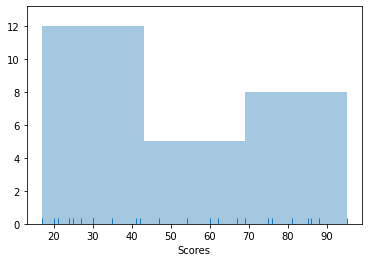

In [11]:
sns.distplot(df["Scores"])
plt.show()
sns.distplot(df["Scores"],kde= False, rug=True)
plt.show()

c:\users\monoj\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'JointGrid' object has no attribute 'annotate'

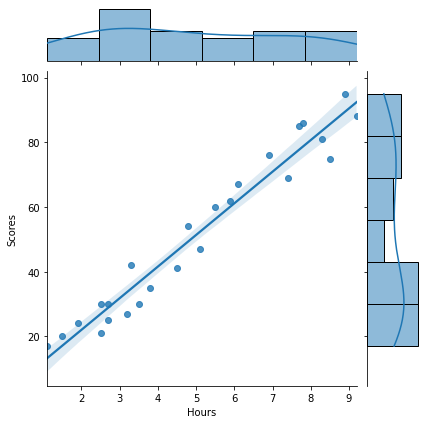

In [12]:
sns.jointplot(df["Hours"],df["Scores"],kind ="reg").annotate(stats.pearsonr)


# Performing Simple Linear Regression

Calculating the coefficient of simple linear regression equation : y =B0+B1.x(B1:slope, B0:Intercept)

In [ ]:
mean_x= np.mean(df["Hours"])
mean_y = np.mean(df["Scores"])
num=0
den = 0
x = list(df["Hours"])
y = list(df["Scores"])

for i in range(len(df)):
    num+= (x[i]-mean_x )*(y[i]-mean_y)
    den+= (x[i]-mean_x)**2
    
B1 = num/den

In [ ]:
B1

In [ ]:
B0 = mean_y -B1*mean_x


In [ ]:
B0

# Predictions

In [ ]:
df["predicted_scores"] = B0 + B1*df['Hours']


In [ ]:
df.head()

In [ ]:
plt.scatter(df['Hours'],df['Scores'])
plt.scatter(df['Hours'],df['predicted_scores'])
plt.plot()


# Prediction of given value :9.25

In [ ]:
B0 + B1*9.25

In [ ]:
y = list(df['Scores'].values)
y_pred = list(df['predicted_scores'].values)


# RMSE

In [ ]:
s = sum([(y_pred[i] - y[i])**2 for i in range(len(df))])
rmse = np.sqrt(s/len(df))/mean_y

In [ ]:
rmse